In [136]:
import pandas as pd

def performance(maxfiles):
    bf = pd.read_csv("outputbf" + str(maxfiles), index_col = None, header = None, sep = "\t")
    lsh = pd.read_csv("outputlsh" + str(maxfiles), index_col = None, header = None, sep = "\t")
    
    bfset = set(zip(bf[0], bf[1]))
    lshset = set(zip(lsh[0], lsh[1]))
    
    TP = len(bfset.intersection(lshset))
    FP = len(lshset - bfset)
    FN = len(bfset - lshset)
    TN = 0
    
    precision = float(TP)/(TP + FP)
    recall = float(TP)/(TP + FN)
    
#     print("----------------------------------")
#     print("|    TP: " + str(TP) + "\t | FP: " + str(FP) + "\t |")
#     print("|    FN: " + str(FN) + "\t | TN: " + str(TN) + "\t |")
#     print("----------------------------------")
    
#     print("precision: " + str(precision))
#     print("recall: " + str(recall))
#     print("F1-score: " + str(2*precision*recall/(precision + recall)))
    
    return precision, recall, 2*precision*recall/(precision + recall)


In [137]:
import subprocess as sp
import timeit as tit

arglist = "java -cp .:lib/* Runner -nRows 20 -nBands 20 -threshold 0.9 -method lsh -maxFiles 10000 -inputPath ./tweetsample -outputPath output -shingleLength 3 -nShingles 1000 -nBuckets 1000000".split(" ")
print(arglist)

maxFiles = str(100000)

# Max Files
arglist[13] = maxFiles

#BucketSize
arglist[23] = str(100000)

# Number of Bands
arglist[7] = str(4)

# Number of Rows
arglist[5] = str(10)

# Number of Shingles
arglist[21] = str(10000)

precision = []
recall = []
fscore = []
time = []
N = 5 

precision = []
recall = []
fscore = []
time = []

N = 5 # Iterations;
for b in range(3,21,2):
  arglist[7] = str(b)
  tprecision = []
  trecall = []
  tfscore = []
  ttime = []
  for r in range(3,21,2):
    arglist[5] = str(r)
    print("Bands: %d \t RowsPerBand: %d" % (b,r))
    def checker(): sp.check_output(arglist)
       
    tims=0
    precs=0
    recs=0
    f1ss=0
    for i in range(N):
        tim = tit.timeit("checker()","from __main__ import checker", number = 1)
        prec, rec, f1s = performance(maxFiles)
        tims += tim
        precs += prec
        recs += rec
        f1ss += f1s
    
    tim = tims/N
    prec = precs/N
    rec = recs/N
    f1s = f1ss/N 
    
    print("Time: %3f" % tim)
 
    tprecision.append(prec)
    trecall.append(rec)
    tfscore.append(f1s)
    ttime.append(tim)
    
  precision.append(tprecision)
  recall.append(trecall)
  fscore.append(tfscore)
  time.append(ttime)
    

    


['java', '-cp', '.:lib/*', 'Runner', '-nRows', '20', '-nBands', '20', '-threshold', '0.9', '-method', 'lsh', '-maxFiles', '10000', '-inputPath', './tweetsample', '-outputPath', 'output', '-shingleLength', '3', '-nShingles', '1000', '-nBuckets', '1000000']
Bands: 3 	 RowsPerBand: 3
Time: 4.407220
Bands: 3 	 RowsPerBand: 5
Time: 5.191456
Bands: 3 	 RowsPerBand: 7
Time: 5.409150
Bands: 3 	 RowsPerBand: 9
Time: 6.128631
Bands: 3 	 RowsPerBand: 11
Time: 6.300147
Bands: 3 	 RowsPerBand: 13
Time: 6.403239
Bands: 3 	 RowsPerBand: 15
Time: 6.937158
Bands: 3 	 RowsPerBand: 17
Time: 7.498674
Bands: 3 	 RowsPerBand: 19
Time: 8.507724
Bands: 5 	 RowsPerBand: 3
Time: 6.683385
Bands: 5 	 RowsPerBand: 5
Time: 5.786852
Bands: 5 	 RowsPerBand: 7
Time: 6.361484
Bands: 5 	 RowsPerBand: 9
Time: 6.765781
Bands: 5 	 RowsPerBand: 11
Time: 7.424565
Bands: 5 	 RowsPerBand: 13
Time: 8.195168
Bands: 5 	 RowsPerBand: 15
Time: 8.630582
Bands: 5 	 RowsPerBand: 17
Time: 9.894568
Bands: 5 	 RowsPerBand: 19
Time: 9.707

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

precisiondf = pd.DataFrame(precision,columns=range(3,21,2),index=range(3,21,2))
recalldf = pd.DataFrame(recall,columns=range(3,21,2),index=range(3,21,2))
fscoredf = pd.DataFrame(fscore,columns=range(3,21,2),index=range(3,21,2))
timedf = pd.DataFrame(time,columns=range(3,21,2),index=range(3,21,2))

In [139]:
precisiondf.to_csv("precision.csv")
recalldf.to_csv("recall.csv")
fscoredf.to_csv("fscore.csv")
timedf.to_csv("time.csv")

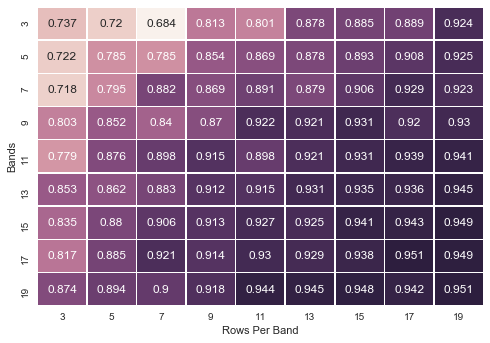

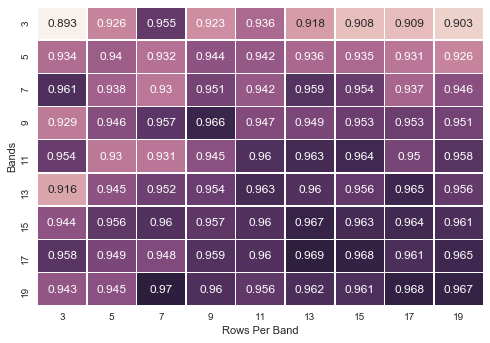

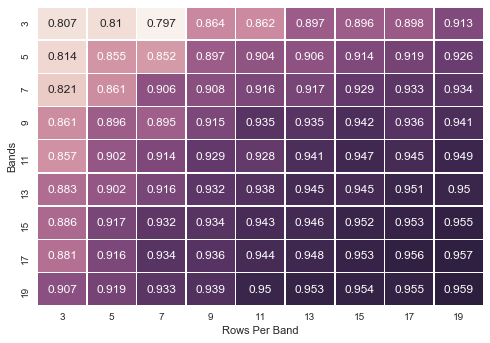

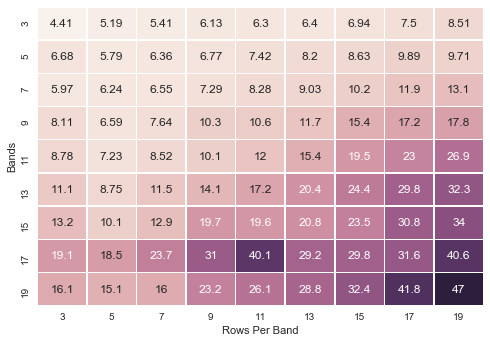

In [140]:
import seaborn as sns
# 
# precisiondf = pd.read_csv("precision.csv",index_col=0,header=0)
# recalldf = pd.read_csv("recall.csv",index_col=0,header=0)
# fscoredf = pd.read_csv("fscore.csv",index_col=0,header=0)
# timedf = pd.read_csv("time.csv",index_col=0,header=0)

sns.heatmap(precisiondf, annot=True, fmt=".3g",cbar=False,linewidths=0.5)
#ax.set_axis_bgcolor("lightslategray")
plt.ylabel("Bands")
plt.xlabel("Rows Per Band")
plt.savefig("precision.png")
plt.show()

sns.heatmap(recalldf, annot=True, fmt=".3g",cbar=False,linewidths=0.5)
plt.ylabel("Bands")
plt.xlabel("Rows Per Band")
plt.savefig("recall.png")
plt.show()

sns.heatmap(fscoredf, annot=True, fmt=".3g",cbar=False,linewidths=0.5)
plt.ylabel("Bands")
plt.xlabel("Rows Per Band")
plt.savefig("fscore.png")
plt.show()

sns.heatmap(timedf, annot=True, fmt=".3g",cbar=False,linewidths=0.5)
plt.ylabel("Bands")
plt.xlabel("Rows Per Band")
plt.savefig("time.png")
plt.show()

plt.clf()

['java', '-cp', '.:lib/*', 'Runner', '-nRows', '20', '-nBands', '20', '-threshold', '0.9', '-method', 'lsh', '-maxFiles', '10000', '-inputPath', './tweetsample', '-outputPath', 'output', '-shingleLength', '3', '-nShingles', '1000', '-nBuckets', '1000']
1000
----------------------------------
|    TP: 6820	 | FP: 2575	 |
|    FN: 135	 | TN: 0	 |
----------------------------------
precision: 0.725918041511
recall: 0.980589503954
F1-score: 0.834250764526
----------------------------------
|    TP: 6501	 | FP: 2158	 |
|    FN: 454	 | TN: 0	 |
----------------------------------
precision: 0.750779535743
recall: 0.934723220705
F1-score: 0.832714230818
----------------------------------
|    TP: 6614	 | FP: 1787	 |
|    FN: 341	 | TN: 0	 |
----------------------------------
precision: 0.787287227711
recall: 0.950970524802
F1-score: 0.861422245376
----------------------------------
|    TP: 6656	 | FP: 2159	 |
|    FN: 299	 | TN: 0	 |
----------------------------------
precision: 0.75507657402

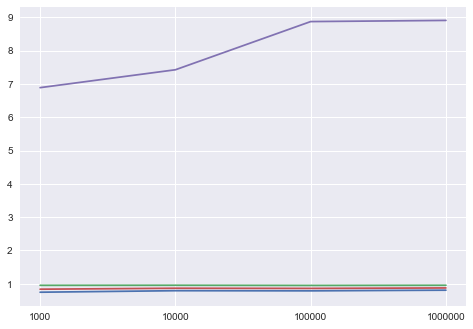

In [94]:
##### import subprocess as sp
import timeit as tit

arglist = "java -cp .:lib/* Runner -nRows 20 -nBands 20 -threshold 0.9 -method lsh -maxFiles 10000 -inputPath ./tweetsample -outputPath output -shingleLength 3 -nShingles 1000 -nBuckets 1000".split(" ")
print(arglist)

maxFiles = str(100000)

# Max Files
arglist[13] = maxFiles

#BucketSize
arglist[23] = str(100000)

# Number of Bands
arglist[7] = str(4)

# Number of Rows
arglist[5] = str(10)

# Number of Shingles
arglist[21] = str(100010)

precision = []
recall = []
fscore = []
time = []
N =  10

shingles =  [str(1000 * 10 ** i) for i in range(4)]
for i in shingles:
    arglist[21] = i
    print(arglist[21])
    
    tims = 0
    precs = 0
    recs = 0
    f1ss = 0
    def checker(): sp.check_output(arglist)
    for i in range(N):
        tim = tit.timeit("checker()","from __main__ import checker", number = 1)
        prec, rec, f1s = performance(maxFiles)
        tims += tim
        precs += prec
        recs += rec
        f1ss += f1s
    
    tim = tims/N
    prec = precs/N
    rec = recs/N
    f1s = f1ss/N
        
        
    precision.append(prec)
    recall.append(rec)
    fscore.append(f1s)
    print("Time Needed" + str(tim))
    time.append(tim)
    

    
plt.plot(shingles, precision)
plt.plot(shingles, recall)
plt.plot(shingles, fscore)
plt.plot(shingles, time)
    


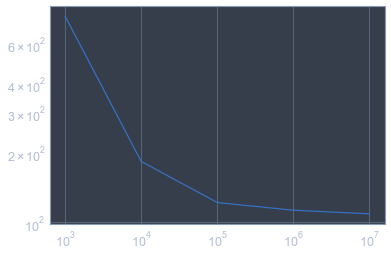

In [29]:
import matplotlib.pyplot as plt
plt.loglog([10**i for i in range(3,8)],[786,184,122,113,109],x)

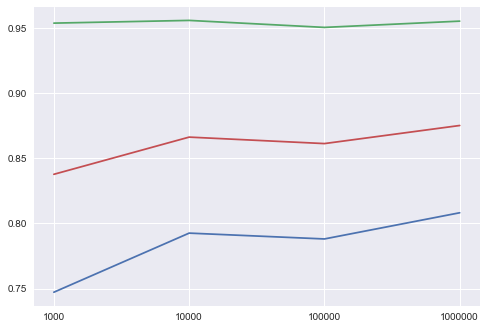

In [100]:

plt.plot(shingles, precision)
plt.plot(shingles, recall)
plt.plot(shingles, fscore)
# plt.plot(time)

[]

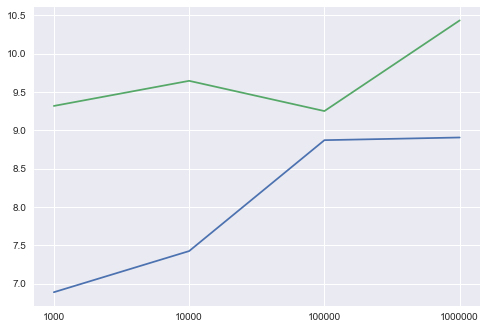

In [99]:
plt.plot(shingles,time,label="Array")
plt.plot(shingles,timehash,label="Function Call")
plt.plot()

In [93]:
timehash = time